In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f = open('data.txt','r')
n = int(f.readline())
X = np.zeros(n)
Y = np.zeros(n)
delta = np.zeros(n+5)
S = np.zeros(n+5)
fact = np.zeros(n+5)
for i in range(n):
    st = f.readline()
    string = st.split()
    X[i] = float(string[0])
    Y[i] = float(string[1])
print(X,Y)

[10. 20. 30. 40. 50.] [0.1736 0.342  0.5    0.6428 0.766 ]


In [9]:
def forward_diff_table(X,Y,n):
    temp = np.zeros(n+5)
    k = 0
    delta[0] = Y[0]
    k+=1
    for i in range(n):
        temp[i] = Y[i]
    for i in reversed(range(1,n)):
        for j in range(i):
            temp[j] = temp[j+1]-temp[j]
        delta[k] = temp[0]
        k += 1

In [14]:
def calculate_S_C_J(s,n):
    for i in range(n):
        if i==0:
            S[i] = 1
            fact[i] = 1
        else:
            S[i] = S[i-1] * (s-i+1)
            fact[i] = fact[i-1] * i

In [15]:
def newton_gregory(x,x0,h,n):
    outputy = 0
    s = (x-x0)/h
    calculate_S_C_J(s,n)
    for i in range(n):
        outputy += (S[i]/fact[i]) * delta[i]
    return outputy
        

In [10]:
forward_diff_table(X,Y,n)

In [11]:
size=104
inval = np.zeros(size)
outval = np.zeros(size)

In [16]:
st = 9
for i in range(size):
    inval[i] = st
    outval[i] = newton_gregory(st,X[0],X[1]-X[0],n)
    st += 0.5

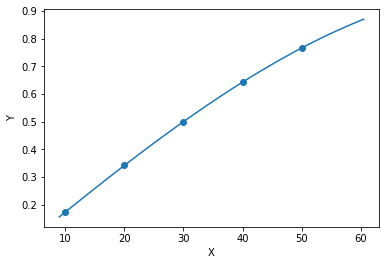

In [17]:
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(inval,outval)
plt.scatter(X,Y)
plt.show()